<a href="https://colab.research.google.com/github/jmorral/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**HOMEWORK 5 Coding: The relationship between concentration of homeless shelters and count of 311 requests related to homeless services**

Problem Statement: Homelesses is a big concern in New York City. The Department of Homeless Services is tasked with providing services and housing for people who are homeless. They recently began publishing the count of homeless shelter buildings per community district on NYC Open Data to provide more transparency into where shelters are located. The dataset provides counts in multiple columns for different categories of buildings. It also includes counts from different reporting dates.

The 311 Service Requests dataset includes a complaint type called "Homeless Person Assistance". Let's find out if there's a relationship between the number of homeless assistance 311 requests and the concentration of homeless shelter buildings per community district.

Step 1. Load the datasets:


In [3]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')
shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header= 'infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Step 2. Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

In [5]:
for column_name in shelter.columns:
  shelter.rename(columns={column_name:column_name.replace(' ', '_').lower()}, inplace=True)

shelter_count = shelter[shelter.report_date == '09/30/2019']

shelter_count.community_district = shelter_count.community_district.astype('float64')
shelter_count = shelter_count.drop_duplicates()
shelter_count.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
624,09/30/2019,Bronx,201.0,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202.0,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203.0,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204.0,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205.0,NaN,1.0,3.0,NaN,12.0,NaN,5.0


Step 3. Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

In [0]:
shelter_count = shelter_count.fillna(0)

shelter_count['sum_col_count'] = shelter_count.apply(lambda row:
                                                   row.adult_family_comm_hotel + 
                                                   row.adult_family_shelter + 
                                                   row.adult_shelter + 
                                                   row.adult_shelter_comm_hotel + 
                                                   row.fwc_cluster + 
                                                   row.fwc_comm_hotel + 
                                                   row.fwc_shelter, 
                                                   axis=1
  )


Step 4. From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

Step 5. Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [0]:
cd_homeless = df[df.complaint_type == 'Homeless Person Assistance']
cd_borocd_homeless = cd_homeless.groupby('borocd').size().reset_index(name='count_of_311_requests')


Step 6. Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

In [0]:
merge_homeless = pd.merge(left=cd_borocd_homeless, right=shelter_count, left_on='borocd', right_on='community_district', how = 'left')
merge_homeless = merge_homeless.fillna(0)


Step 7. Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

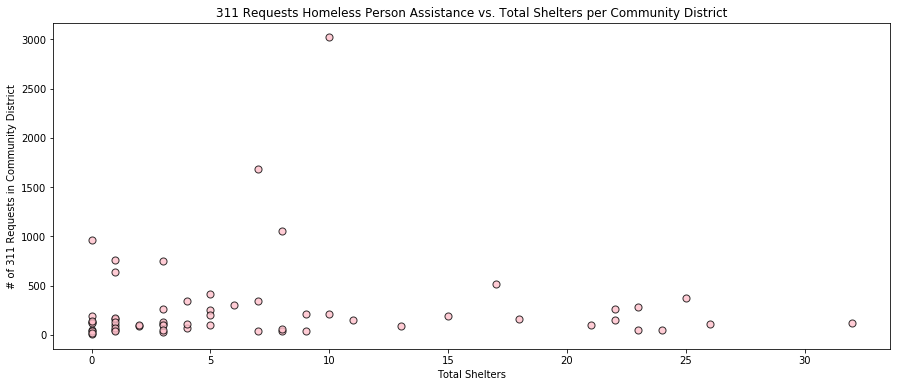

In [9]:
#plot recipe
plt.figure(figsize=(15,6))

x = np.array(merge_homeless.sum_col_count)
y = np.array(merge_homeless.count_of_311_requests)

plt.scatter(
  x,
  y,
  alpha=0.8,
  c='pink',
  s=50,
  edgecolors = 'black'
  
)


#Labels
plt.title('311 Requests Homeless Person Assistance vs. Total Shelters per Community District')
plt.xlabel('Total Shelters')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

Step 8. Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.



In [10]:
np.corrcoef(x,y)

array([[1.        , 0.01073618],
       [0.01073618, 1.        ]])

Step 9. Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [11]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.006571
Date:                Wed, 04 Dec 2019   Prob (F-statistic):              0.936
Time:                        22:25:59   Log-Likelihood:                -445.94
No. Observations:                  59   AIC:                             895.9
Df Residuals:                      57   BIC:                             900.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.4772     83.126      3.302      0.0

Step 10. Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package


In [0]:
p = model.params
r2 = model.rsquared
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))

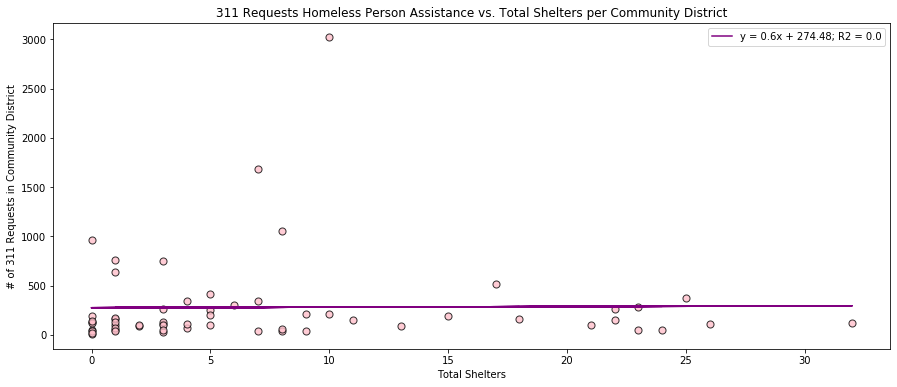

In [13]:
#plot recipe
plt.figure(figsize=(15,6))
x_dummy = np.array(merge_homeless.sum_col_count)
x = np.array(merge_homeless.sum_col_count)
y = np.array(merge_homeless.count_of_311_requests)

plt.scatter(
  x,
  y,
  alpha=0.8,
  c='pink',
  s=50,
  edgecolors = 'black'
  
)

plt.plot(
    x_dummy,
    p[0] + p[1] * x_dummy,
    c = 'purple',
    label=label
)


#Labels
plt.title('311 Requests Homeless Person Assistance vs. Total Shelters per Community District')
plt.xlabel('Total Shelters')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

Step 11: Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

From looking at the results from corrcoef from numPy we can see that there is essentially no correlation as the numbers are very close to zero. When adding in the best fit line based on the parameters gained from the regression analysis, the line is mostly flat, and the R^2 value is zero. An R^2 value of 0.0 would indicate no linear relationship between the counts of 311 data and the concentration of homeless shelters. 

